Universidade Federal do Rio Grande do Sul (UFRGS)

Programa de Pós-Graduação em Engenharia Civil (PPGEC)

PEC00025: Introdução à Teoria de Vibrações

## Trabalho 2.2:
# Análise dinâmica de modelo estrutural com múltiplos graus de liberdade

__Discente:__ 00312135 - Cleiton Ricardo Oestreich

### 1. Definição dos parâmetros iniciais para modelagem estrutural

Para a resolução do problema proposto, modelou-se, com o auxílio do _software Ftools_, uma estrutura aporticada em aço MR 250 com as seguintes propriedades e dimensões:

i. Altura: 60,0 m; <br />
ii. Largura da base = 4,0 m; <br />
iii. Profundidade = 10,0 m; <br />
iv. Distância entre os nós verticais = 3,0 m; <br />
v. Distância entre os nós horizontais = 2,0 m; <br />
vi. Material constituinte:  Aço MR250 <br />
vii. Tipo: Perfil (tipo H) W200 x 41,7 (Gerdau) <br />
viii. Massa linear = 41,7 kg/m <br />
ix. E =200000 MPa; <br />
x. Área = 53,5 cm² <br />

A representação gráfica da estrutura está apresentada na Figura 1.

                                               Figura 1 - Estrutura modelada
<img src="Documents/Estrutura modelada.png" alt="Estrutura" width="250px"/>




### 2. Montagem da matrix de flexibilidade $(H)$

Para a análise da estrutura com múltiplos graus de liberdade será utilizado o método dos deslocamentos. Como todos os membros da estrutura são constituídos pelo mesmo material, é imposto que a estrutura é homogênea e apresenta as mesmas características. Por conseguinte, pode-se lançar uma carga unitária de 1 N em pontos específicos da estrutura, a fim de se obter os deslocamentos correspondentes em cada nó quando a força é aplicada.


No sistema, a força é aplicada sobre os nós 6, 12, 18, 24, 30, 36, 42, 48, 54 e 60, espaçados em 6 metros um do outro (correspondente a dois pavimentos). Os deslocamentos resultantes, divididos pelo módulo da carga aplicada correspondente, podem ser organizados como colunas em uma matriz chamada matriz de flexibilidade (H), conforme apresentada na Figura 2. Os coeficientes da matriz de flexibilidade estão em m/N.

                                                Figura 2 - Matriz de Flexibilidade
<img src="Documents/Matriz de flexibilidade.png" width="600px"/>


### 3. Montagem da matriz de rigidez $(K)$

Cada coeficiente da Matriz de Flexibilidade $Hij$ representa o deslocamento generalizado no grau de liberdade i correspondente, causado pela força unitária aplicada no seu respectivo grau de liberdade j. Como a matriz é simétrica, o contrário também é verificado.

Para obter-se a Matriz de Rigidez da estrutura, temos que $H^-1=K$.

<img src="Documents/Matriz de rigidez.png" alt="Matriz de Rigidez" width="600px"/>


### 4. Montagem da  matriz de massa concentrada $(M)$

Para a análise dinâmica, diferentemente da análise estática, a carga é variável no tempo e, além das forças representadas pela matriz de rigidez da estrutura, o sistema também reage com forças inerciais e dissipativas. Numericamente, o modo mais simples de explicar a atuação das forças inerciais é agrupando as massas dos elementos na vizinhança de cada nó (mestre) e atribuir essas massas aos graus de liberdade correspondentes.

Para o modelo em análise será considerado somente a estrutura em aço MR250. De acordo com o catálogo fornecido pela fabricante, a massa linear do perfil é de 41,7 kg/m. 

Para o cálculo de massa correspondente a cada nó, será adotado a seguinte configuração:

2 barras de 4 metros = 8 m; <br />
2 barras de 10 metros = 20 m; <br />
4 barras de 1,5 metros = 6 m; <br />
Massa total por nó = 34 m * 41,7 kg/m = 1417,8 kg; <br />

Como os nós centrais, com exceção do último, recebem influência de ambos os pavimentos, a massa nesses nós é dobrada. Cada massa nodal gera uma força inercial que atua sempre que ocorre uma aceleração no grau de liberdade correspondente
Deste modo, pode-se definir a matriz de massa concentrada, como:

<img src="Documents/Matriz de massa.png" alt="Matriz de massa" width="600px"/>


### 5. Cálculo da frequência fundamental

A partir das matrizes de flexibilidade e de massa, pode-se determinar as frequências fundamentais e os modos de vibração da estrutura. Para a resolução da questão, utiliza-se a resolução dos autovalores e autovetores calculados a partir do Módulo Scipy.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sc

In [18]:
# Flexibility coefficients in m/N
H1 = np.array([[0.3910, 0.4300, 0.4428, 0.4553, 0.4679, 0.4805, 0.4931, 0.5057, 0.5183, 0.5309], 
               [0.4300, 0.8279, 0.9053, 0.9559, 1.006, 1.057, 1.107, 1.157, 1.208, 1.258], 
               [0.4428, 0.9053, 1.367, 1.507, 1.621, 1.734, 1.847, 1.960, 2.074, 2.187], 
               [0.4553, 0.9559, 1.507, 2.057, 2.285, 2.487, 2.688, 2.889, 3.091, 3.292], 
               [0.4679, 1.006, 1.621, 2.285, 2.948, 3.290, 3.604, 3.919, 4.234, 4.548],
               [0.4805, 1.057, 1.734, 2.487, 3.290, 4.091, 4.571, 5.024, 5.477, 5.930],
               [0.4931, 1.107, 1.847, 2.688, 3.604, 4.571, 5.536, 6.179, 6.796, 7.413],
               [0.5057, 1.157, 1.960, 2.889, 3.919, 5.024, 6.179, 7.333, 8.165, 8.971],
               [0.5183, 1.208, 2.074, 3.091, 4.234, 5.477, 6.796, 8.165, 9.533, 10.58],
               [0.5309, 1.258, 2.187, 3.292, 4.548, 5.930, 7.413, 8.971, 10.58, 12.19]])*1e-6

In [19]:
# Stiffness coefficients in N/m
K1 = np.linalg.inv(H1)


In [20]:
# Lumped mass matrix in kg
M1 = np.array([[2835.6, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
               [0, 2835.6, 0, 0, 0, 0, 0, 0, 0, 0], 
               [0, 0, 2835.6, 0, 0, 0, 0, 0, 0, 0], 
               [0, 0, 0, 2835.6, 0, 0, 0, 0, 0, 0], 
               [0, 0, 0, 0, 2835.6, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 2835.6, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 2835.6, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 2835.6, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 2835.6, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 1417.8]])

In [21]:
w2, phi = sc.eig(K1, M1)

print (w2)

print(phi)

[4993.91671551+0.j 4584.57487586+0.j 4014.12968304+0.j 3215.26802972+0.j
 2405.44773065+0.j 1644.96879117+0.j  972.41783905+0.j  467.37252912+0.j
  121.02893558+0.j    9.95037976+0.j]
[[ 0.097032    0.21419866 -0.2940267   0.37235173 -0.41264829  0.42236388
  -0.38475193  0.30887984  0.17776871 -0.03420536]
 [-0.19624952 -0.3764116   0.41468889 -0.32520588  0.12785159  0.13782499
  -0.34563384  0.43935586  0.3165507  -0.07625312]
 [ 0.28250642  0.42781037 -0.25036685 -0.10405997  0.38391071 -0.36191005
   0.04912471  0.34385567  0.40279214 -0.12610713]
 [-0.35664853 -0.3445189  -0.08048246  0.419012   -0.20857128 -0.26997081
   0.39546164  0.07239592  0.41847865 -0.18153732]
 [ 0.40474042  0.16612289  0.36199797 -0.23351338 -0.33257171  0.26646283
   0.34150444 -0.22784827  0.35855432 -0.24037535]
 [-0.42378205  0.06091043 -0.38697733 -0.21600537  0.29049884  0.38242829
  -0.05612805 -0.3945435   0.23131439 -0.30053906]
 [ 0.40234876 -0.25779197  0.15355712  0.41829285  0.27912623 -0.1

A partir da aplicação do método e dos dados fornecidos, obteve-se  frequência fundamental e os quatro primeiros modos de vibração da estrutura.

w² = 9,957 rad/s$

fn=  w / 2π= √(9,957)/2π = 0,50 Hz

Da mesma maneira, o módulo Python fornece os auto vetores que correspondem a esta frequência. Os autovalores e autovetores são resolvidos com a função scipy eig do módulo linalg:

$(-0,0340; -0,0761; -0,1259; -0,1814; -0,2403; -0,3005; -0,3601; -0,4174; -0,4710; -0,5201)$


In [22]:
# Uses scipy to solve the standard eigenvalue problem
w21, Phi1 = sc.eig(K1, M1)

# Ensure ascending order of eigenvalues
iw   = w21.argsort()
w21  = w21[iw]
Phi1 = Phi1[:,iw]

# Eigenvalues to vibration frequencies
wk1  = np.sqrt(np.real(w21)) 
fk1  = wk1/2/np.pi

Com isso, os primeiros quatro autovalores referentes aos quatro primeiros modos de vibração apresentados anteriormente, são:

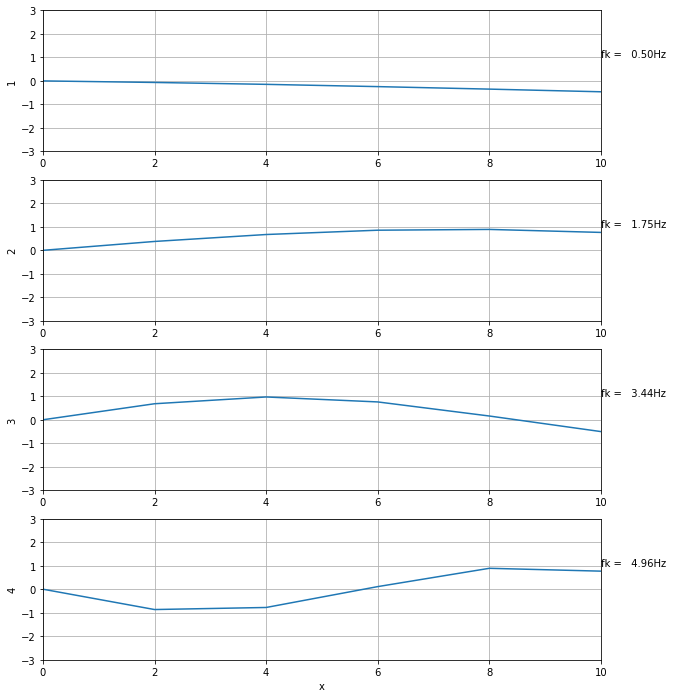

In [23]:
plt.figure(1, figsize=(10,40))
x = np.arange(0, 24, 2)

for k in range(4):
    pk = np.zeros(12)
    pk[1:-1] = Phi1[:,k]
    pk /= np.max(np.abs(pk))   # adjust scale for unity amplitude
    
    plt.subplot(13,1,k+1)
    plt.plot(x, pk)
    
    plt.xlim( 0.0, 10.0);
    plt.ylim(-3,  3);  plt.ylabel(str(k+1));
    plt.text(10, 1, 'fk = {0:6.2f}Hz'.format(fk1[k]));
    plt.grid(True)

plt.xlabel('x');

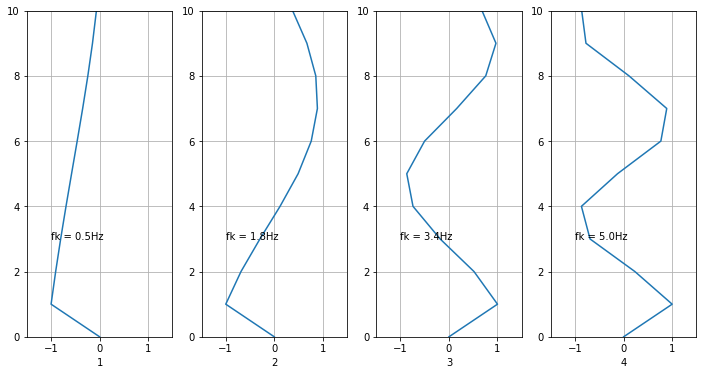

In [24]:
plt.figure(3, figsize=(12,6))
x = np.arange(11)

for k in range(4):
    pk = np.zeros(11)
    pk[1:] = Phi1[::-1,k]
    pk /= np.max(np.abs(pk))   # adjust scale for unity amplitude
    
    plt.subplot(1,4,k+1)
    plt.plot(pk, x)
    
    plt.xlim(-1.5, 1.5);  plt.xlabel(str(k+1));
    plt.ylim( 0.0, 10);
    plt.text(-1.0, 3.0, 'fk = {0:3.1f}Hz'.format(fk1[k]));
    plt.grid(True)

### 6. Resposta da estrutura a uma velocidade inicial

A partir das frequências fundamentais de vibração, é possível verificar a resposta da estrutura à aplicação de uma força que atua no intervalo td = $Tn/4$, onde Tn é menor período relacionado às frequências de vibração. A força pode ser considerada como um impulso que age na estrutura provocando uma velocidade inicial. A partir da aplicação de uma força de 10 $kN$, verifica-se o valor da velocidade inicial.

In [25]:
fmax = np.max(fk1)
print(fmax)
F = 10000
Tn = 1/fmax
td = Tn/4
m = 2835
v0 = F*td/m
print(v0)

v0_v = [v0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
u0_v = np.zeros(10)

11.247105768004884
0.07840543454976119


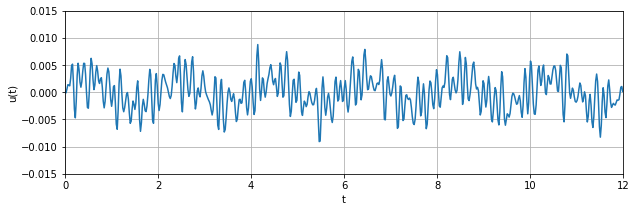

In [26]:
Phit = Phi1.transpose()   
xi = np.pi/2
UMAX = np.zeros(10)
    
for k in range (10):
    Mi = np.dot(np.dot(Phit[k], M1), phi[k])
    umax = (np.dot(np.dot(Phit[k], M1),v0_v)) / (wk1[k]*np.sin(xi)*Mi)
    
    UMAX[k] = umax
    
t = np.linspace(0,20,1000)
uk = np.zeros((10,1000))

for k in range(10):
    
    uk[k,:] = UMAX[k]*np.cos(-wk1[k]*t - np.pi/2)
    
u = np.dot(phi, uk)

plt.figure(2, figsize=(10,3))
plt.plot(t,u[5,:])
plt.xlim(0.0, 12.0); plt.xlabel('t');
plt.ylim(-0.015, 0.015); plt.ylabel('u(t)');
plt.grid(True)

### 7. Amortecimento de Rayleigh

O amortecimento de um sistema pode ser determinado a partir da resposta do mesmo a uma excitação externa transitória e em função da resposta em frequência. Por conseguinte, pode-se calcular os coeficientes 𝑎0 𝑒 𝑎1 como proporcionais às frequências de vibração de cada modo de amortecimento.


In [27]:
zeta = np.zeros(10)
zeta[0] = 0.01
zeta[1] = 0.01
alfa1 = 2*(zeta[0]*wk1[0]-zeta[1]*wk1[1])/(wk1[0]**2-wk1[1]**2)
alfa0 = 2*zeta[0]*wk1[0]-alfa1*wk1[1]**2

for k in range (8):
    zeta[k+2] = (alfa0/(2*wk1[k+2]))+(alfa1*wk1[k+2]/2)
    
print(zeta)
print('Os coeficientes alfa0 e alfa1 são:')
print(alfa0)
print(alfa1)

[0.01       0.01       0.01277642 0.02029876 0.02732115 0.0335469
 0.03910527 0.04390565 0.04703499 0.04915807]
Os coeficientes alfa0 e alfa1 são:
-0.1079078540108283
0.0014128546887155335
